# Seaborn Basics

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [2]:
tips = sns.load_dataset('tips')

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Distribution Plot
**We get a histogram and a KDE (Kernel Density Estimation)**

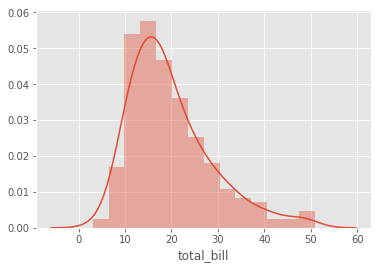

In [4]:
sns.distplot(tips['total_bill'])
plt.savefig('images/sns_1dist.png',dpi=200)

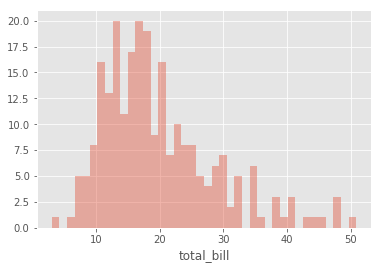

In [5]:
sns.distplot(tips['total_bill'], kde=False, bins=40) # We can remove the KDE

## Joints Plot
Match up two distribution plots for bivariat data

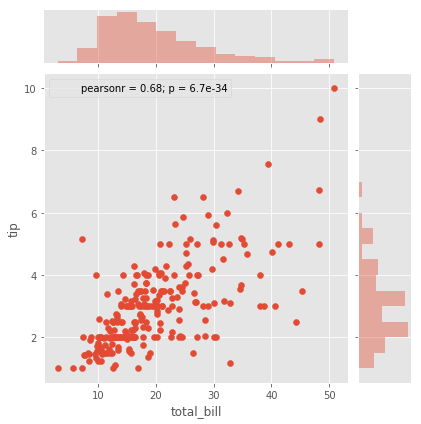

In [6]:
sns.jointplot(x='total_bill',y='tip',data=tips)
plt.savefig('images/sns_2jointsplot.png',dpi=200)

#### The`kind` parameter changes the type of plot inside

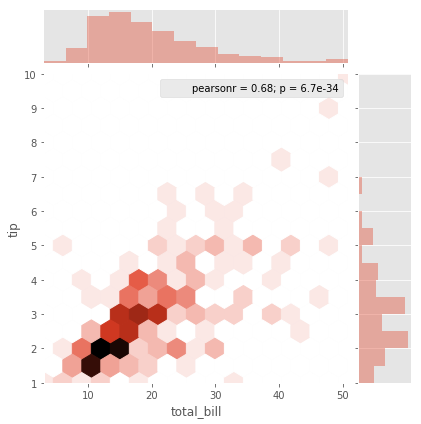

In [7]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='hex')
plt.savefig('images/sns_2joints_hex.png',dpi=200)

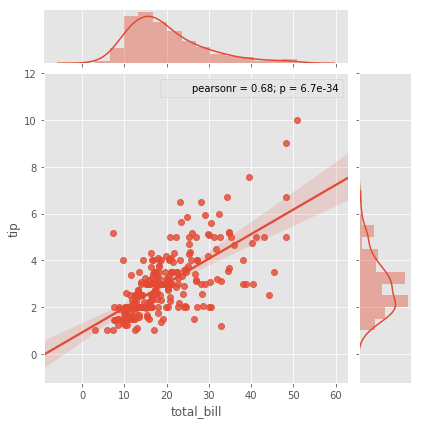

In [8]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='reg')
plt.savefig('images/sns_2joints_regression.png',dpi=200)

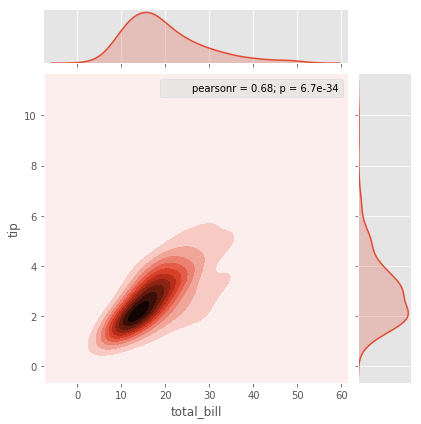

In [9]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='kde')
plt.savefig('images/sns_2joints_kde.png',dpi=200)

### Pairplot
does jointsplot for everysingle combination within the df
_when it is a combination of the same thing, instead of doing a scatter plot it does a histogram._

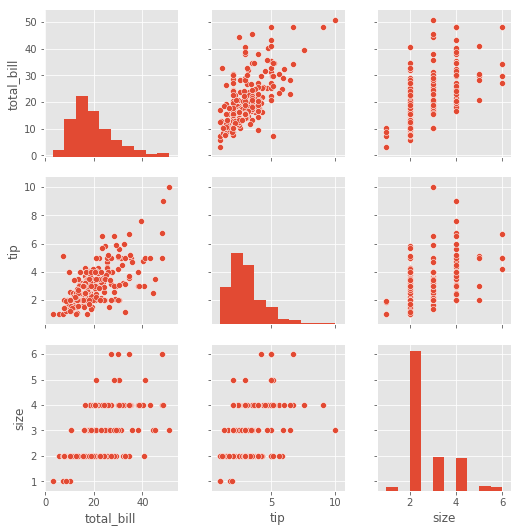

In [10]:
sns.pairplot(tips)
plt.savefig('images/sns_3pairplot.png',dpi=200)

#### The `hue` attribute takes a categorical column name

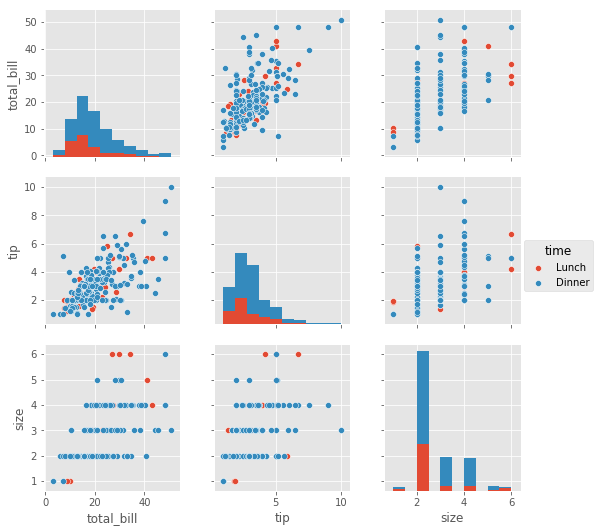

In [19]:
sns.pairplot(tips, hue='time')
plt.savefig('images/sns_3pairplot_hue.png',dpi=200)

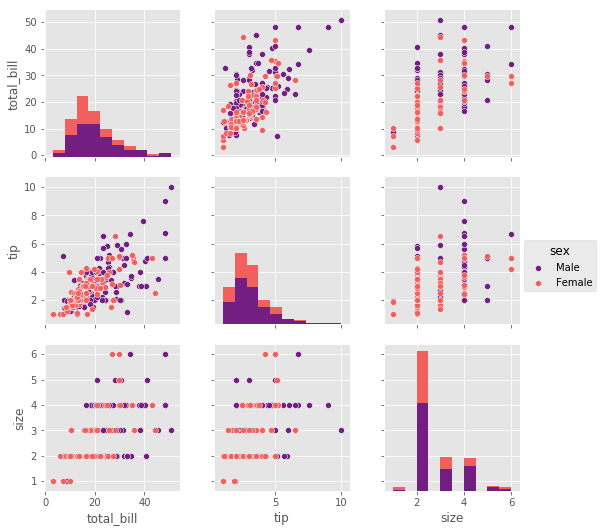

In [12]:
sns.pairplot(tips, hue='sex',palette='magma')
plt.savefig('images/sns_3pairplot_palette.png',dpi=200)

### Rugplot
related to histogram. It draws a dash mark for every snigle point along the distribution line

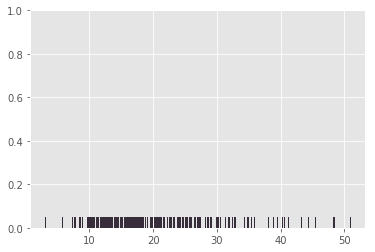

In [13]:
sns.rugplot(tips['total_bill'],color='#372d3b')
plt.savefig('images/sns_4rugplot.png',dpi=200)

### Kernel Density Estimation Plot

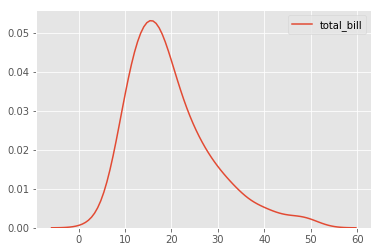

In [14]:
sns.kdeplot(tips['total_bill'])
plt.savefig('images/sns_5kdeplot.png',dpi=200)

### Going behind the scenes with a random dataset

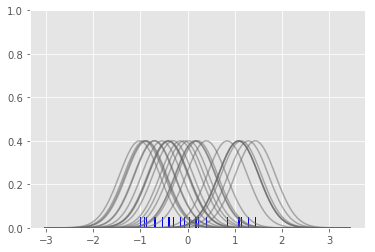

In [15]:
import numpy as np
from scipy import stats

#Creating a random dataset
dataset = np.random.randn(25)

# Another Rugplot
sns.rugplot(dataset,color='b');

# 100 equally spaced points from x_min to x_max
x_min = dataset.min() - 2
x_max = dataset.max() + 2
x_axis = np.linspace(x_min,x_max,100)

# The Bandwidth
bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2

# An Empty kernel list
kernel_list = []

# Plotting Each basis function
for data_point in dataset:    
    # A kernel for each point and appending to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel) 
    
    # Scale for the plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color='#666666',alpha=0.5)

plt.ylim(0,1)

plt.savefig('images/sns_6normdist.png', dpi=200)

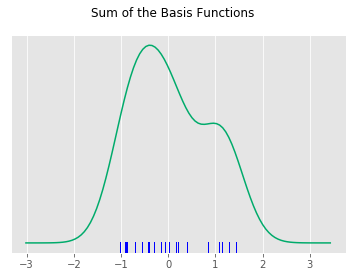

In [16]:
# To get the kde plot we can sum these basis functions.

sum_of_kde = np.sum(kernel_list,axis=0)

fig = plt.plot(x_axis,sum_of_kde,color='#00ab6b')
sns.rugplot(dataset,c = 'b')

plt.yticks([])
plt.suptitle("Sum of the Basis Functions")

_We could have gotten the same plot using:_

`sns.kdeplot(dataset)
sns.rugplot(dataset,c = 'b')`

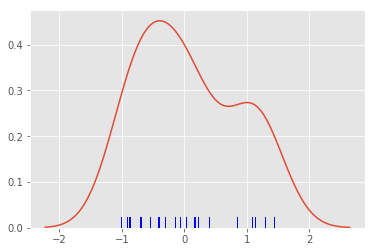

In [17]:
sns.kdeplot(dataset)
sns.rugplot(dataset,c = 'b')